## <font color = '#11009E'> Sentiment vs. Return Rate - classification

#1 TESLA

>Algorithms:
    <ol>
    <li>Logistic Regression</li>
    <li>K-Nearest Neighbors (KNN)</li>
    <li>Support Vector Machines (SVM)</li>
    <li>Naive Bayes Classifier: MultinomialNB, GaussianNB, BernoulliNB</li>
    <li>Decision Trees</li>
    <li>Random Forest (RF)</li>
    <li>Adaptive Boosting</li>
    <li>eXtreme Gradient Boosting (XGBoost)</li>
    <li>Catboost</li>
    <li>Light Gradient Boosting Machine (LGBM)</li>
    </ol>
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Libraries for algorithms:

!! Don't forget to use hyperparameter tuning to get better performance

In [2]:
# Grid Search or RandomizedSearchCV for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve
# Metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score,auc,roc_curve, roc_auc_score, ConfusionMatrixDisplay 
# Logistic Regresion
from sklearn.linear_model import LogisticRegression
# Naive Bayes Classifiers
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB 
# Support Vector Machines
from sklearn.svm import LinearSVC, SVC
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Decision Trees + Random Forest
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Boosting Algorithms
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import catboost
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn import gaussian_process, neural_network


In [3]:
tweets = pd.read_csv('../data/final tweets.csv')
stocks = pd.read_csv('../data/stocks_data.csv')
vader_indicators_daily = pd.read_csv('../data/indicators_VADER_sentiment.csv')

In [4]:
tweets.head()
tweets.drop('date.1', axis = 1, inplace = True)
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
0,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[],"{'neg': 0.245, 'neu': 0.392, 'pos': 0.363, 'co...",0.0516,0.245,0.363,0.392,positive,0.194079,0.00,0.050000,neutral,NEGATIVE,0.999413,0
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[],"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.8126,0.000,0.363,0.637,positive,1.000000,0.65,0.600000,positive,POSITIVE,0.996815,1
2,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.00,0.000000,neutral,POSITIVE,0.953198,1
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[],"{'neg': 0.239, 'neu': 0.364, 'pos': 0.397, 'co...",0.5994,0.239,0.397,0.364,positive,0.248428,0.55,0.633333,positive,NEGATIVE,0.969831,1
4,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.00,0.750000,neutral,POSITIVE,0.954011,1


In [5]:
columns_to_drop = ['blob_polarity','blob_subjectivity', 'blob_sentiment', 'sentiment_flair','probability_flair',
                   'classified_similarly']
tweets.drop(columns_to_drop, axis = 1, inplace=True)

In [6]:
tweets.isna().sum()

date                        0
tweet                       0
tweet_clean_func            0
tweet_emojis                0
tweet_clean              1267
hashtag                     0
vader_clean_scores          0
vader_clean_compound        0
vader_negative              0
vader_positive              0
vader_neutral               0
vader_clean_sentiment       0
vader_clean_polarity     8638
dtype: int64

In [7]:
tweets['vader_clean_polarity'].fillna(0, inplace=True)
tweets['tweet_clean'].fillna('', inplace=True)

In [8]:
tweets.isna().sum()

date                     0
tweet                    0
tweet_clean_func         0
tweet_emojis             0
tweet_clean              0
hashtag                  0
vader_clean_scores       0
vader_clean_compound     0
vader_negative           0
vader_positive           0
vader_neutral            0
vader_clean_sentiment    0
vader_clean_polarity     0
dtype: int64

In [9]:
stocks.head()
stocks = stocks.rename(columns = {'Date':'date'})
stocks.head()

,date,Close_Tsla,Volume_Tsla,simple_return_Tsla,log_return_Tsla,Close_Tsla_Rescaled,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,label_rt_Tsla,label_rt_Btc,label_rt_Doge
0,2010-06-29,1.592667,281494500,NaN,NaN,0.001319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2010-06-30,1.588667,257806500,-0.002511,-0.002515,0.001309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2010-07-01,1.464000,123282000,-0.078473,-0.081723,0.001004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2010-07-02,1.280000,77097000,-0.125683,-0.134312,0.000554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2010-07-06,1.074000,103003500,-0.160937,-0.175470,0.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


- Create 3 dfs for each stock:
    1. Tesla
    2. Dogecoin
    3. Bitcoin
- Merge Vader Sentiment Indicators with each df


In [10]:
columns_tesla = ['date', 'Close_Tsla', 'Volume_Tsla', 'simple_return_Tsla', 'log_return_Tsla',
                 'Close_Tsla_Rescaled', 'label_rt_Tsla']

columns_bitcoin = ['date', 'Close_Btc', 'Volume_Btc', 'simple_return_Btc','log_return_Btc', 
                   'Close_Btc_Rescaled', 'label_rt_Btc']

columns_dogecoin = ['date', 'Close_Doge', 'Volume_Doge','simple_return_Doge', 'log_return_Doge', 
                    'Close_Doge_Rescaled', 'label_rt_Doge']

tesla_df = stocks[columns_tesla]
bitcoin_df = stocks[columns_bitcoin]
dogecoin_df = stocks[columns_dogecoin]

In [11]:
vader_indicators_daily.head()

,date,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
0,2010-06-04,0.051600,0.194079,0.245000,0.363000,0.392000
1,2011-12-01,0.406300,1.000000,0.000000,0.181500,0.818500
2,2011-12-03,0.299700,0.248428,0.119500,0.198500,0.682000
3,2011-12-04,0.734600,1.000000,0.000000,0.508000,0.492000
4,2011-12-21,0.269667,0.477783,0.121167,0.264833,0.613833


In [12]:
vader_indicators_daily.set_index('date', inplace=True)

### <font color = '#C4B0FF'>TESLA

In [13]:
tesla_df.shape

(3241, 7)

In [14]:
tesla_df

,date,Close_Tsla,Volume_Tsla,simple_return_Tsla,log_return_Tsla,Close_Tsla_Rescaled,label_rt_Tsla
0,2010-06-29,1.592667,281494500,NaN,NaN,0.001319,0
1,2010-06-30,1.588667,257806500,-0.002511,-0.002515,0.001309,0
2,2010-07-01,1.464000,123282000,-0.078473,-0.081723,0.001004,0
3,2010-07-02,1.280000,77097000,-0.125683,-0.134312,0.000554,0
4,2010-07-06,1.074000,103003500,-0.160937,-0.175470,0.000051,0
...,...,...,...,...,...,...,...
3236,2023-05-08,171.789993,112249400,0.010173,0.010121,0.417534,1
3237,2023-05-09,169.149994,88965000,-0.015368,-0.015487,0.411078,0
3238,2023-05-10,168.539993,119840700,-0.003606,-0.003613,0.409586,0
3239,2023-05-11,172.080002,103889900,0.021004,0.020786,0.418243,1


In [15]:
tesla_df.set_index('date', inplace=True)
tesla = pd.merge(tesla_df, vader_indicators_daily, left_index=True, right_index=True, how='left')
tesla

,Close_Tsla,Volume_Tsla,simple_return_Tsla,log_return_Tsla,Close_Tsla_Rescaled,label_rt_Tsla,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,,,,,,
2010-06-29,1.592667,281494500,NaN,NaN,0.001319,0,NaN,NaN,NaN,NaN,NaN
2010-06-30,1.588667,257806500,-0.002511,-0.002515,0.001309,0,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.464000,123282000,-0.078473,-0.081723,0.001004,0,NaN,NaN,NaN,NaN,NaN
2010-07-02,1.280000,77097000,-0.125683,-0.134312,0.000554,0,NaN,NaN,NaN,NaN,NaN
2010-07-06,1.074000,103003500,-0.160937,-0.175470,0.000051,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,171.789993,112249400,0.010173,0.010121,0.417534,1,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,169.149994,88965000,-0.015368,-0.015487,0.411078,0,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,168.539993,119840700,-0.003606,-0.003613,0.409586,0,0.181463,0.762771,0.036657,0.276943,0.629229


In [16]:
tesla = tesla[['label_rt_Tsla', 'vader_clean_compound', 'vader_clean_polarity', 'vader_negative', 
               'vader_positive', 'vader_neutral']]
tesla.fillna(0, inplace=True)
tesla

/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_5440/1034687833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla.fillna(0, inplace=True)


,label_rt_Tsla,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,
2010-06-29,0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-06-30,0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-01,0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-02,0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-06,0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2023-05-08,1,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,0,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,0,0.181463,0.762771,0.036657,0.276943,0.629229


In [17]:
X = tesla.drop('label_rt_Tsla', axis = 1) 
y = tesla['label_rt_Tsla']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=1234)

In [18]:
X_train.shape

(2430, 5)

In [19]:
X_test.shape

(811, 5)

Sources for inspiration:
- Idea from this Kaggle notebook: https://www.kaggle.com/code/mariiagusarova/algorithm-selection-express-methodology/notebook

- and idea from this Medium article: https://medium.com/@data.science.enthusiast/an-express-methodology-to-select-a-machine-learning-algorithm-8c243e37d2fe

#### Create a summary for all models used in analysis

In [20]:
clf = [
    AdaBoostClassifier(n_estimators=50, random_state=1234),
    RandomForestClassifier(random_state=1234),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()), # SVC does not have predict_proba, and is wrapped into CalibratedClassifierCV
    DecisionTreeClassifier(random_state=1234),
    XGBClassifier(n_estimators=50, random_state=1234),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=3),
    CatBoostClassifier(iterations=100, random_state=42),
    LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234),
    BernoulliNB()
    ]

In [21]:
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    clf_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    clf_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    clf_compare.loc[row_index, 'AUC'] = round(roc_auc_score(y_test, alg.predict_proba(X_test)[:,1]),5)
    clf_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted)
    row_index+=1


Learning rate set to 0.124333
0:	learn: 0.6914609	total: 65.2ms	remaining: 6.46s
1:	learn: 0.6901147	total: 67.6ms	remaining: 3.31s
2:	learn: 0.6887509	total: 69.6ms	remaining: 2.25s
3:	learn: 0.6879255	total: 71.8ms	remaining: 1.72s
4:	learn: 0.6874101	total: 74ms	remaining: 1.41s
5:	learn: 0.6865764	total: 76.1ms	remaining: 1.19s
6:	learn: 0.6858165	total: 77.1ms	remaining: 1.02s
7:	learn: 0.6849737	total: 79.2ms	remaining: 911ms
8:	learn: 0.6840352	total: 81.4ms	remaining: 823ms
9:	learn: 0.6833124	total: 83.5ms	remaining: 751ms
10:	learn: 0.6826780	total: 85.4ms	remaining: 691ms
11:	learn: 0.6820870	total: 87.5ms	remaining: 642ms
12:	learn: 0.6815811	total: 89.5ms	remaining: 599ms
13:	learn: 0.6804597	total: 91.1ms	remaining: 560ms
14:	learn: 0.6795290	total: 92ms	remaining: 521ms
15:	learn: 0.6789740	total: 92.9ms	remaining: 488ms
16:	learn: 0.6786896	total: 93.6ms	remaining: 457ms
17:	learn: 0.6782516	total: 94.4ms	remaining: 430ms
18:	learn: 0.6776933	total: 95.1ms	remaining: 40

In [22]:
clf_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)    
clf_compare

,Classifier,Train Accuracy,Test Accuracy,Precission,Recall,AUC,F1 Score
0,AdaBoostClassifier,0.5564,0.5277,0.530303,0.751790,0.53041,0.621915
5,XGBClassifier,0.7432,0.5216,0.526678,0.730310,0.51620,0.612000
9,LGBMClassifier,0.7189,0.5154,0.522569,0.718377,0.51564,0.605025
8,CatBoostClassifier,0.6230,0.5117,0.518578,0.766110,0.50545,0.618497
7,KNeighborsClassifier,0.6267,0.5179,0.523102,0.756563,0.49683,0.618537
10,BernoulliNB,0.5169,0.4945,0.510740,0.510740,0.49588,0.510740
1,RandomForestClassifier,0.7716,0.5043,0.514431,0.723150,0.49221,0.601190
4,DecisionTreeClassifier,0.7716,0.4982,0.510417,0.701671,0.48752,0.590955
6,LogisticRegression,0.5165,0.5142,0.516734,0.921241,0.48642,0.662093
3,CalibratedClassifierCV,0.5160,0.5166,0.516646,1.000000,0.47809,0.681301


#### <font color = '#4942E4'> LOGISTIC REGRESSION


In [23]:
# lr = LogisticRegression(C = 1e-05, solver ='newton-cg')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### From a total of 811 observations, 417 were correctly classified 

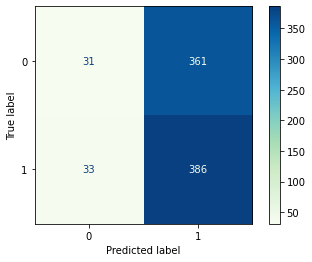

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.08      0.14       392
           1       0.52      0.92      0.66       419

    accuracy                           0.51       811
   macro avg       0.50      0.50      0.40       811
weighted avg       0.50      0.51      0.41       811



In [26]:
lr_cv_train = cross_val_score(lr, X_train, y_train, cv=5) 
lr_cv_train.mean()

0.5102880658436214

In [27]:
lr_cv_test = cross_val_score(lr, X_test, y_test, cv=5) 
lr_cv_test.mean()

0.5043020525638113

#### <font color = '#4942E4'> K-NEAREST NEIGHBORS

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Before tuning: 

From a total of 811 observations, 420 were correctly classified 

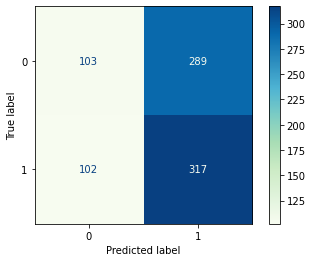

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

##### Hyperparameter tuning

In [30]:
neighbors_list = [3,5,10,20,50,75,100]
accuracy_list = []

for test_number in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors = test_number)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
results_df = pd.DataFrame({'neighbors':neighbors_list, 'accuracy':accuracy_list})

In [31]:
results_df

,neighbors,accuracy
0,3,0.517879
1,5,0.514180
2,10,0.521578
3,20,0.512947
4,50,0.530210
5,75,0.510481
6,100,0.503083


In [32]:
neighbors_list = list(range(5, 500, 5))
accuracy_list = []

for test_number in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors = test_number)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
results_df = pd.DataFrame({'neighbors':neighbors_list, 'accuracy':accuracy_list})

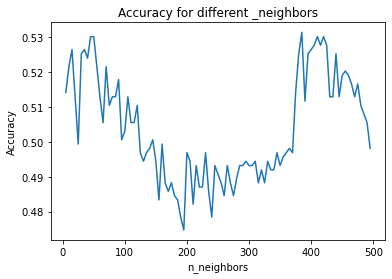

In [33]:
plt.plot(results_df['neighbors'], results_df ['accuracy'])
# Add the labels and title
plt.gca().set(xlabel='n_neighbors', ylabel='Accuracy', title='Accuracy for different _neighbors')
plt.show()

In [34]:
knn_tuned = KNeighborsClassifier(n_neighbors=50)
knn_tuned.fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39       392
           1       0.53      0.74      0.62       419

    accuracy                           0.53       811
   macro avg       0.53      0.52      0.50       811
weighted avg       0.53      0.53      0.51       811



#### From a total of 811 observations, 430 were correctly classified 

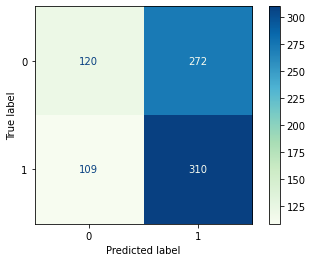

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=knn_tuned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_tuned.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [37]:
# Accuracy of knn on train:
knn_tuned.score(X_train, y_train)

0.5423868312757202

In [38]:
# Accuracy of knn on test:
knn_tuned.score(X_test, y_test)

0.530209617755857

In [39]:
# Precision of knn on test:
precision_score(y_test, y_pred)

0.5326460481099656

In [40]:
knn_cv_train = cross_val_score(knn_tuned, X_train, y_train, cv=5) 
knn_cv_train.mean()

0.519753086419753

In [41]:
knn_cv_test = cross_val_score(knn_tuned, X_test, y_test, cv=5) 
knn_cv_test.mean()

0.4845262440354465

#### <font color = '#4942E4'> SUPPORT VECTOR MACHINES


In [42]:
svm_linear = SVC( kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

#### From a total of 811 observations, 419 were correctly classified 

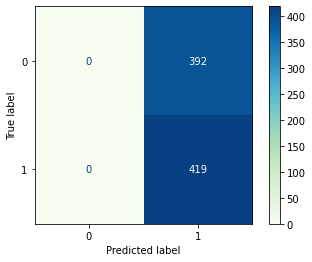

In [43]:
cm = confusion_matrix(y_test, y_pred, labels=svm_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.52      1.00      0.68       419

    accuracy                           0.52       811
   macro avg       0.26      0.50      0.34       811
weighted avg       0.27      0.52      0.35       811



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [45]:
svm_linear_train_cv = cross_val_score(svm_linear, X_train, y_train, cv=5)
svm_linear_train_cv.mean()

0.5160493827160494

In [46]:
svm_linear_test_cv = cross_val_score(svm_linear, X_test, y_test, cv=5)
svm_linear_test_cv.mean()

0.48456411421646595

#### <font color = '#4942E4'> DECISION TREES


In [47]:
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test)

Before tuning: 

From a total of 811 observations, 404 were correctly classified 

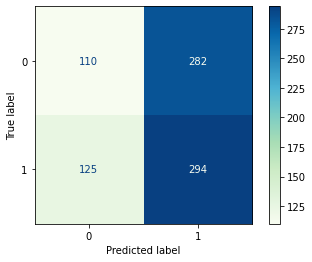

In [48]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

##### Hyperparameter tuning

In [49]:
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

param_dist = {"max_depth": [3,5,7,10,15],
#               'min_samples_leaf': randint(1, 9),
              "max_features": [3, 5, 7, 9, 11],
              'min_samples_split':[8,10,12,18,20,16],
#               "n_estimators": [50, 70, 100, 200],
              "criterion": ["gini", "entropy"]}

tree_cv = GridSearchCV(estimator=tree, param_grid=param_dist, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')

In [50]:
tree_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 3, 'min_samples_split': 8}
Best score is 0.5234567901234568


In [51]:
tree_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth= 15, max_features= 3, 
                                    min_samples_split= 8, random_state=1234)
tree_tuned.fit(X_train, y_train) 
y_pred = tree_tuned.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36       392
           1       0.52      0.73      0.61       419

    accuracy                           0.51       811
   macro avg       0.51      0.51      0.49       811
weighted avg       0.51      0.51      0.49       811



#### From a total of 811 observations, 417 were correctly classified 

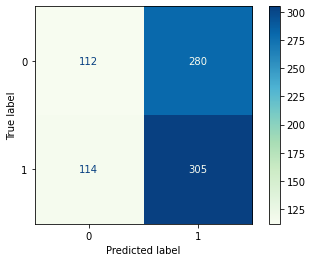

In [53]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [54]:
# Accuracy of decision tree on train: 
tree_tuned.score(X_train, y_train)

0.6654320987654321

In [55]:
# Accuracy of decision tree on test:
tree_tuned.score(X_test, y_test)

0.5141800246609125

In [56]:
# Precision of decision tree on test:
precision_score(y_test, y_pred)

0.5213675213675214

In [57]:
# ROC-AUC score:
round(roc_auc_score(y_test, tree_tuned.predict_proba(X_test)[:,1]),5)

0.50853

In [58]:
tree_cv_train = cross_val_score(tree_tuned, X_train, y_train, cv=10) 
tree_cv_train.mean()

0.4950617283950618

In [59]:
tree_cv_test = cross_val_score(tree_tuned, X_test, y_test, cv=10) 
tree_cv_test.mean()

0.5092442035531466

#### <font color = '#4942E4'> RANDOM FOREST


In [60]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Before tuning: 

From a total of 811 observations, 409 were correctly classified 

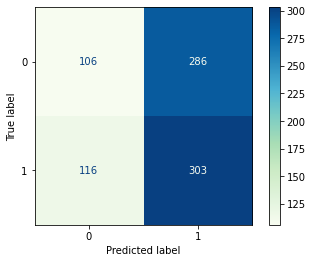

In [61]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = [3, 5, 7, 9, 11]
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]


# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf
             }
param_grid

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
 'max_features': [3, 5, 7, 9, 11],
 'max_depth': [2, 4],
 'min_samples_leaf': [1, 2]}

In [63]:
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)

rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=17; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=25; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=33; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=41; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=41; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=48; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=56; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=56; total time=   0.1s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=72; total time=   0

[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=17; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=17; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=25; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=33; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=33; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=41; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=56; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=56; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
             n_jobs=4,
             param_grid={'max_depth': [2, 4], 'max_features': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [64]:
rf_Grid.best_params_

{'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 48}

In [65]:
# Print the best score for given hyperparameters 

print("Best score is {}".format(rf_Grid.best_score_))

Best score is 0.5205761316872428


#### From a total of 811 observations, 420 were correctly classified 

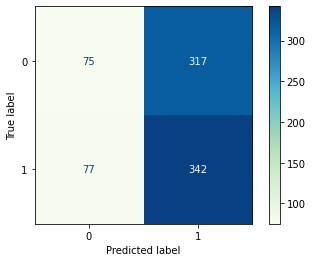

In [66]:
# Generate predictions with the best model
y_pred = rf_Grid.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_Grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_Grid.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.19      0.28       392
           1       0.52      0.82      0.63       419

    accuracy                           0.51       811
   macro avg       0.51      0.50      0.46       811
weighted avg       0.51      0.51      0.46       811



In [68]:
# Accuracy of rf on train:
rf_Grid.score(X_train, y_train)

0.5440329218106996

In [69]:
# Accuracy of rf on test:
rf_Grid.score(X_test, y_test)

0.5141800246609125

In [70]:
# Precision of rf on test:
precision_score(y_test, y_pred)

0.5189681335356601

In [71]:
# ROC-AUC score:
round(roc_auc_score(y_test, rf_Grid.predict_proba(X_test)[:,1]),5)

0.50032

#### <font color = '#4942E4'> MULTINOMIAL NAIVE BAYES


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax_train = scaler.fit_transform(X_train)
X_minmax_test = scaler.fit_transform(X_test)

naive = MultinomialNB()
# naive.fit(X_train, y_train)
# y_pred = naive.predict(X_test)
# Because Multinomial NB cannot work with negative values -- error: Negative values in data passed to MultinomialNB (input X)
#     we have to scale the features

naive.fit(X_minmax_train, y_train)
y_pred = naive.predict(X_minmax_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.52      1.00      0.68       419

    accuracy                           0.52       811
   macro avg       0.26      0.50      0.34       811
weighted avg       0.27      0.52      0.35       811



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

#### From a total of 811 observations, 419 were correctly classified 

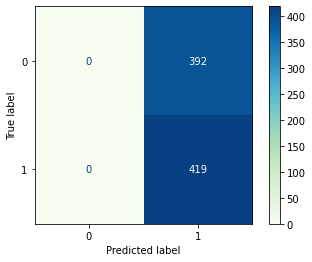

In [74]:
cm = confusion_matrix(y_test, y_pred, labels=naive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [75]:
# Accuracy of decision tree on train:
naive.score(X_minmax_train, y_train)

0.5160493827160494

In [76]:
# Accuracy of decision tree on test:
naive.score(X_minmax_test, y_test)

0.5166461159062885

In [77]:
# Precision of decision tree on test:
precision_score(y_test, y_pred)

0.5166461159062885

In [78]:
round(roc_auc_score(y_test,naive.predict_proba(X_test)[:,1]),5)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


0.48339

In [79]:
naive_cv_train = cross_val_score(naive, X_minmax_train, y_train, cv=10) 
naive_cv_train.mean()

0.5156378600823045

In [80]:
naive_cv_test = cross_val_score(naive, X_minmax_test, y_test, cv=10) 
naive_cv_test.mean()

0.5314513700692562

#### <font color = '#4942E4'> BERNOULLI NAIVE BAYES

In [81]:
bernoulli =  BernoulliNB()
bernoulli.fit(X_train, y_train)
# Predict on the test set
y_pred = bernoulli.predict(X_test)

#### From a total of 811 observations, 401 were correctly classified 

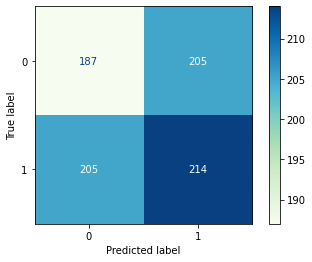

In [82]:
cm = confusion_matrix(y_test, y_pred, labels=bernoulli.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.48      0.48       392
           1       0.51      0.51      0.51       419

    accuracy                           0.49       811
   macro avg       0.49      0.49      0.49       811
weighted avg       0.49      0.49      0.49       811



In [84]:
bernoulli_cv_train = cross_val_score(bernoulli, X_train, y_train, cv=5) 
bernoulli_cv_train.mean()

0.51440329218107

In [85]:
bernoulli_cv_test = cross_val_score(bernoulli, X_test, y_test, cv=5) 
bernoulli_cv_test.mean()

0.4685450276452321

#### <font color = '#4942E4'> GAUSSIAN NAIVE BAYES

In [86]:
gaussian =  GaussianNB()
gaussian.fit(X_train, y_train)
# Predict on the test set
y_pred = gaussian.predict(X_test)

#### From a total of 811 observations, 385 were correctly classified 

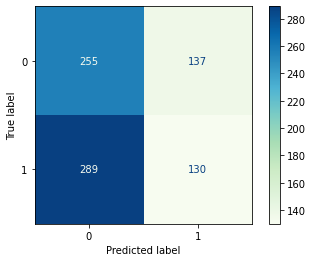

In [87]:
cm = confusion_matrix(y_test, y_pred, labels=gaussian.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.65      0.54       392
           1       0.49      0.31      0.38       419

    accuracy                           0.47       811
   macro avg       0.48      0.48      0.46       811
weighted avg       0.48      0.47      0.46       811



In [89]:
gaussian_cv_train = cross_val_score(gaussian, X_train, y_train, cv=5) 
gaussian_cv_train.mean()

0.49794238683127573

In [90]:
gaussian_cv_test = cross_val_score(gaussian, X_test, y_test, cv=5) 
gaussian_cv_test.mean()

0.525282132848595

#### <font color = '#4942E4'> ADAPTIVE BOOSTING


In [91]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=1234)

# Train the classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test)

#### From a total of 811 observations, 428 were correctly classified 

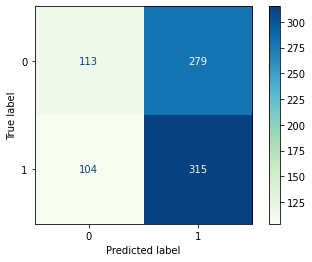

In [92]:
cm = confusion_matrix(y_test, y_pred, labels=adaboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.29      0.37       392
           1       0.53      0.75      0.62       419

    accuracy                           0.53       811
   macro avg       0.53      0.52      0.50       811
weighted avg       0.53      0.53      0.50       811



In [94]:
adaboost_cv_train = cross_val_score(adaboost, X_train, y_train, cv=5) 
adaboost_cv_train.mean()

0.51440329218107

In [95]:
adaboost_cv_test = cross_val_score(adaboost, X_test, y_test, cv=5) 
adaboost_cv_test.mean()

0.5092706203135651

#### <font color = '#4942E4'> eXTREME GRADIENT BOOSTING (XGB)


In [96]:
# Create an XGBoost classifier
xgb = XGBClassifier(n_estimators=50, random_state=1234)

# Train the classifier
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

#### From a total of 811 observations, 423 were correctly classified 

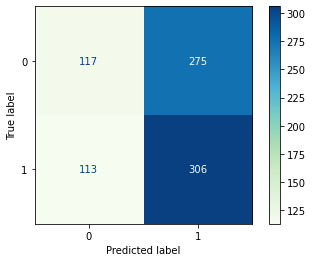

In [97]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.30      0.38       392
           1       0.53      0.73      0.61       419

    accuracy                           0.52       811
   macro avg       0.52      0.51      0.49       811
weighted avg       0.52      0.52      0.50       811



In [99]:
xgb_cv_train = cross_val_score(xgb, X_train, y_train, cv=10) 
xgb_cv_train.mean()

0.5020576131687242

In [100]:
xgb_cv_test = cross_val_score(xgb, X_test, y_test, cv=10) 
xgb_cv_test.mean()

0.493285155073773

#### <font color = '#4942E4'> CATBOOST

In [101]:
# Create a CatBoost classifier
catboost = CatBoostClassifier(iterations=100, random_state=42)

# Train the classifier
catboost.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost.predict(X_test)

Learning rate set to 0.124333
0:	learn: 0.6914609	total: 1.73ms	remaining: 171ms
1:	learn: 0.6901147	total: 2.69ms	remaining: 132ms
2:	learn: 0.6887509	total: 3.37ms	remaining: 109ms
3:	learn: 0.6879255	total: 4.02ms	remaining: 96.5ms
4:	learn: 0.6874101	total: 4.66ms	remaining: 88.6ms
5:	learn: 0.6865764	total: 5.52ms	remaining: 86.5ms
6:	learn: 0.6858165	total: 6.31ms	remaining: 83.8ms
7:	learn: 0.6849737	total: 7.21ms	remaining: 83ms
8:	learn: 0.6840352	total: 7.97ms	remaining: 80.6ms
9:	learn: 0.6833124	total: 8.71ms	remaining: 78.3ms
10:	learn: 0.6826780	total: 9.52ms	remaining: 77ms
11:	learn: 0.6820870	total: 10.3ms	remaining: 75.7ms
12:	learn: 0.6815811	total: 11.3ms	remaining: 75.6ms
13:	learn: 0.6804597	total: 12.2ms	remaining: 75ms
14:	learn: 0.6795290	total: 13ms	remaining: 73.9ms
15:	learn: 0.6789740	total: 14.1ms	remaining: 74.3ms
16:	learn: 0.6786896	total: 15.2ms	remaining: 74.2ms
17:	learn: 0.6782516	total: 16.1ms	remaining: 73.3ms
18:	learn: 0.6776933	total: 16.9ms	re

#### From a total of 811 observations, 415 were correctly classified

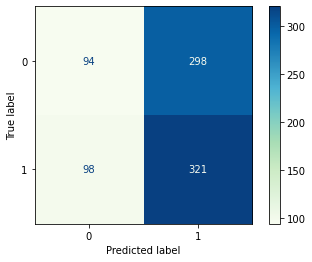

In [102]:
cm = confusion_matrix(y_test, y_pred, labels=catboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.24      0.32       392
           1       0.52      0.77      0.62       419

    accuracy                           0.51       811
   macro avg       0.50      0.50      0.47       811
weighted avg       0.50      0.51      0.48       811



In [104]:
catboost_cv_train = cross_val_score(catboost, X_train, y_train, cv=10) 
catboost_cv_train.mean()

Learning rate set to 0.118864
0:	learn: 0.6920852	total: 1.2ms	remaining: 119ms
1:	learn: 0.6910796	total: 2.46ms	remaining: 121ms
2:	learn: 0.6894152	total: 3.91ms	remaining: 127ms
3:	learn: 0.6882889	total: 6.49ms	remaining: 156ms
4:	learn: 0.6873967	total: 7.5ms	remaining: 142ms
5:	learn: 0.6863035	total: 8.62ms	remaining: 135ms
6:	learn: 0.6851905	total: 9.72ms	remaining: 129ms
7:	learn: 0.6847589	total: 10.9ms	remaining: 125ms
8:	learn: 0.6841987	total: 12.2ms	remaining: 123ms
9:	learn: 0.6832765	total: 13.1ms	remaining: 118ms
10:	learn: 0.6825401	total: 14ms	remaining: 113ms
11:	learn: 0.6817463	total: 15ms	remaining: 110ms
12:	learn: 0.6809146	total: 16.1ms	remaining: 108ms
13:	learn: 0.6801564	total: 17ms	remaining: 105ms
14:	learn: 0.6796505	total: 18.7ms	remaining: 106ms
15:	learn: 0.6790122	total: 19.5ms	remaining: 102ms
16:	learn: 0.6784280	total: 20.6ms	remaining: 100ms
17:	learn: 0.6775245	total: 21.4ms	remaining: 97.4ms
18:	learn: 0.6768932	total: 22.1ms	remaining: 94.3m

15:	learn: 0.6797373	total: 11.8ms	remaining: 62.2ms
16:	learn: 0.6793130	total: 12.9ms	remaining: 62.9ms
17:	learn: 0.6787581	total: 14ms	remaining: 63.9ms
18:	learn: 0.6782544	total: 15ms	remaining: 64.1ms
19:	learn: 0.6774986	total: 15.9ms	remaining: 63.8ms
20:	learn: 0.6770947	total: 16.8ms	remaining: 63.4ms
21:	learn: 0.6765005	total: 17.8ms	remaining: 63.1ms
22:	learn: 0.6757545	total: 18.7ms	remaining: 62.7ms
23:	learn: 0.6752331	total: 19.7ms	remaining: 62.3ms
24:	learn: 0.6743937	total: 20.8ms	remaining: 62.5ms
25:	learn: 0.6739175	total: 22.1ms	remaining: 62.8ms
26:	learn: 0.6736323	total: 23.1ms	remaining: 62.4ms
27:	learn: 0.6728831	total: 24ms	remaining: 61.7ms
28:	learn: 0.6724748	total: 24.9ms	remaining: 60.9ms
29:	learn: 0.6717674	total: 25.8ms	remaining: 60.2ms
30:	learn: 0.6713226	total: 26.8ms	remaining: 59.6ms
31:	learn: 0.6708191	total: 27.8ms	remaining: 59ms
32:	learn: 0.6701793	total: 28.8ms	remaining: 58.6ms
33:	learn: 0.6698046	total: 29.9ms	remaining: 58ms
34:

97:	learn: 0.6390917	total: 59.7ms	remaining: 1.22ms
98:	learn: 0.6388641	total: 60.4ms	remaining: 610us
99:	learn: 0.6382707	total: 61ms	remaining: 0us
Learning rate set to 0.118864
0:	learn: 0.6917834	total: 626us	remaining: 62ms
1:	learn: 0.6908902	total: 1.17ms	remaining: 57.5ms
2:	learn: 0.6899521	total: 1.68ms	remaining: 54.2ms
3:	learn: 0.6890658	total: 2.7ms	remaining: 64.7ms
4:	learn: 0.6878440	total: 3.84ms	remaining: 73ms
5:	learn: 0.6871073	total: 5.05ms	remaining: 79.1ms
6:	learn: 0.6863000	total: 6.36ms	remaining: 84.5ms
7:	learn: 0.6850361	total: 7.4ms	remaining: 85.1ms
8:	learn: 0.6845811	total: 8.23ms	remaining: 83.2ms
9:	learn: 0.6834561	total: 9.06ms	remaining: 81.5ms
10:	learn: 0.6829203	total: 9.67ms	remaining: 78.3ms
11:	learn: 0.6823356	total: 10.4ms	remaining: 76.6ms
12:	learn: 0.6817450	total: 11.2ms	remaining: 75.2ms
13:	learn: 0.6808621	total: 11.9ms	remaining: 73.3ms
14:	learn: 0.6798003	total: 12.6ms	remaining: 71.4ms
15:	learn: 0.6791013	total: 13.3ms	rema

45:	learn: 0.6632281	total: 29ms	remaining: 34ms
46:	learn: 0.6626424	total: 29.8ms	remaining: 33.6ms
47:	learn: 0.6623992	total: 30.4ms	remaining: 32.9ms
48:	learn: 0.6621075	total: 30.9ms	remaining: 32.2ms
49:	learn: 0.6614003	total: 31.5ms	remaining: 31.5ms
50:	learn: 0.6611080	total: 32.1ms	remaining: 30.8ms
51:	learn: 0.6609179	total: 32.7ms	remaining: 30.2ms
52:	learn: 0.6602729	total: 33.3ms	remaining: 29.5ms
53:	learn: 0.6600396	total: 33.9ms	remaining: 28.9ms
54:	learn: 0.6597606	total: 34.5ms	remaining: 28.2ms
55:	learn: 0.6594733	total: 35.2ms	remaining: 27.6ms
56:	learn: 0.6591787	total: 35.8ms	remaining: 27ms
57:	learn: 0.6586455	total: 36.7ms	remaining: 26.6ms
58:	learn: 0.6580567	total: 37.7ms	remaining: 26.2ms
59:	learn: 0.6576232	total: 38.3ms	remaining: 25.5ms
60:	learn: 0.6572769	total: 39ms	remaining: 24.9ms
61:	learn: 0.6569851	total: 39.6ms	remaining: 24.3ms
62:	learn: 0.6568154	total: 40.3ms	remaining: 23.7ms
63:	learn: 0.6561902	total: 41ms	remaining: 23.1ms
64:

0.5082304526748971

In [105]:
catboost_cv_test = cross_val_score(catboost, X_test, y_test, cv=10) 
catboost_cv_test.mean()

Learning rate set to 0.074356
0:	learn: 0.6921308	total: 824us	remaining: 81.6ms
1:	learn: 0.6906510	total: 1.39ms	remaining: 67.9ms
2:	learn: 0.6894445	total: 1.92ms	remaining: 62ms
3:	learn: 0.6884222	total: 2.43ms	remaining: 58.4ms
4:	learn: 0.6878081	total: 2.99ms	remaining: 56.8ms
5:	learn: 0.6866943	total: 3.54ms	remaining: 55.4ms
6:	learn: 0.6856906	total: 4.04ms	remaining: 53.7ms
7:	learn: 0.6847860	total: 4.59ms	remaining: 52.7ms
8:	learn: 0.6838577	total: 5.14ms	remaining: 52ms
9:	learn: 0.6828244	total: 5.78ms	remaining: 52ms
10:	learn: 0.6819242	total: 6.24ms	remaining: 50.5ms
11:	learn: 0.6812858	total: 6.83ms	remaining: 50.1ms
12:	learn: 0.6805558	total: 7.45ms	remaining: 49.9ms
13:	learn: 0.6800737	total: 8.11ms	remaining: 49.8ms
14:	learn: 0.6795177	total: 8.7ms	remaining: 49.3ms
15:	learn: 0.6786777	total: 9.19ms	remaining: 48.3ms
16:	learn: 0.6783611	total: 9.87ms	remaining: 48.2ms
17:	learn: 0.6778015	total: 10.4ms	remaining: 47.4ms
18:	learn: 0.6769557	total: 11.1ms

64:	learn: 0.6498783	total: 28.2ms	remaining: 15.2ms
65:	learn: 0.6490658	total: 28.8ms	remaining: 14.8ms
66:	learn: 0.6485972	total: 29.3ms	remaining: 14.4ms
67:	learn: 0.6479615	total: 29.7ms	remaining: 14ms
68:	learn: 0.6475298	total: 30.1ms	remaining: 13.5ms
69:	learn: 0.6470287	total: 30.5ms	remaining: 13.1ms
70:	learn: 0.6463452	total: 30.9ms	remaining: 12.6ms
71:	learn: 0.6460229	total: 31.3ms	remaining: 12.2ms
72:	learn: 0.6455039	total: 31.7ms	remaining: 11.7ms
73:	learn: 0.6450228	total: 32.1ms	remaining: 11.3ms
74:	learn: 0.6444077	total: 32.5ms	remaining: 10.8ms
75:	learn: 0.6439729	total: 32.9ms	remaining: 10.4ms
76:	learn: 0.6437697	total: 33.4ms	remaining: 9.97ms
77:	learn: 0.6435218	total: 33.8ms	remaining: 9.53ms
78:	learn: 0.6430419	total: 34.2ms	remaining: 9.09ms
79:	learn: 0.6427500	total: 34.7ms	remaining: 8.67ms
80:	learn: 0.6423808	total: 35.1ms	remaining: 8.23ms
81:	learn: 0.6418062	total: 35.5ms	remaining: 7.79ms
82:	learn: 0.6411604	total: 36ms	remaining: 7.37

Learning rate set to 0.0744
0:	learn: 0.6919323	total: 603us	remaining: 59.7ms
1:	learn: 0.6909363	total: 1.01ms	remaining: 49.4ms
2:	learn: 0.6899560	total: 1.43ms	remaining: 46.3ms
3:	learn: 0.6885717	total: 1.84ms	remaining: 44.1ms
4:	learn: 0.6876344	total: 2.33ms	remaining: 44.2ms
5:	learn: 0.6861317	total: 2.76ms	remaining: 43.3ms
6:	learn: 0.6854750	total: 3.21ms	remaining: 42.6ms
7:	learn: 0.6845063	total: 3.62ms	remaining: 41.7ms
8:	learn: 0.6833073	total: 4.02ms	remaining: 40.6ms
9:	learn: 0.6826733	total: 4.46ms	remaining: 40.1ms
10:	learn: 0.6811985	total: 4.88ms	remaining: 39.5ms
11:	learn: 0.6803457	total: 5.25ms	remaining: 38.5ms
12:	learn: 0.6796101	total: 5.66ms	remaining: 37.9ms
13:	learn: 0.6789735	total: 6.08ms	remaining: 37.4ms
14:	learn: 0.6781622	total: 6.53ms	remaining: 37ms
15:	learn: 0.6773089	total: 6.93ms	remaining: 36.4ms
16:	learn: 0.6766113	total: 7.4ms	remaining: 36.2ms
17:	learn: 0.6759835	total: 7.87ms	remaining: 35.9ms
18:	learn: 0.6752320	total: 8.31

Learning rate set to 0.0744
0:	learn: 0.6923142	total: 977us	remaining: 96.8ms
1:	learn: 0.6910579	total: 6.09ms	remaining: 298ms
2:	learn: 0.6895008	total: 7.24ms	remaining: 234ms
3:	learn: 0.6884155	total: 8.09ms	remaining: 194ms
4:	learn: 0.6874384	total: 9.22ms	remaining: 175ms
5:	learn: 0.6862548	total: 10.7ms	remaining: 167ms
6:	learn: 0.6852755	total: 11.8ms	remaining: 156ms
7:	learn: 0.6842426	total: 13.3ms	remaining: 152ms
8:	learn: 0.6836569	total: 14.4ms	remaining: 145ms
9:	learn: 0.6831395	total: 16.3ms	remaining: 146ms
10:	learn: 0.6822427	total: 17.5ms	remaining: 142ms
11:	learn: 0.6816148	total: 19.3ms	remaining: 142ms
12:	learn: 0.6805384	total: 21.2ms	remaining: 142ms
13:	learn: 0.6797690	total: 22.2ms	remaining: 136ms
14:	learn: 0.6787884	total: 23.9ms	remaining: 136ms
15:	learn: 0.6781891	total: 25.7ms	remaining: 135ms
16:	learn: 0.6774846	total: 27.5ms	remaining: 134ms
17:	learn: 0.6767098	total: 30.7ms	remaining: 140ms
18:	learn: 0.6760517	total: 31.5ms	remaining: 

0.4957241794640169

#### <font color = '#4942E4'> LIGHT GRADIENT BOOSTING MACHINE (LGBM)


In [106]:
lgbm = LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234)
lgbm.fit(X_train, y_train, verbose=20, eval_metric='logloss')
y_pred = lgbm.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


#### From a total of 811 observations, 418 were correctly classified 

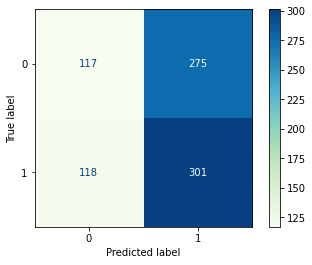

In [107]:
cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.37       392
           1       0.52      0.72      0.61       419

    accuracy                           0.52       811
   macro avg       0.51      0.51      0.49       811
weighted avg       0.51      0.52      0.49       811



In [109]:
lgbm_cv_train = cross_val_score(lgbm, X_train, y_train, cv=10) 
lgbm_cv_train.mean()

0.502880658436214

In [110]:
lgbm_cv_test = cross_val_score(lgbm, X_test, y_test, cv=10) 
lgbm_cv_test.mean()

0.4821740439626619

##### <font color = '#C4B0FF'>CREATE LAG 1 VARIABLE FOR VADER SENTIMENT COMPOUND



In [111]:
tesla

,label_rt_Tsla,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,
2010-06-29,0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-06-30,0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-01,0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-02,0,0.000000,0.000000,0.000000,0.000000,0.000000
2010-07-06,0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2023-05-08,1,0.199254,0.496062,0.077538,0.326231,0.596205
2023-05-09,0,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,0,0.181463,0.762771,0.036657,0.276943,0.629229


In [112]:
lag = 1
tesla['vader_clean_compound_lag'] = tesla['vader_clean_compound'].shift(lag)
tesla.dropna(inplace=True)
tesla.head()

/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_5440/3878260946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla['vader_clean_compound_lag'] = tesla['vader_clean_compound'].shift(lag)
/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_5440/3878260946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla.dropna(inplace=True)


,label_rt_Tsla,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral,vader_clean_compound_lag
date,,,,,,,
2010-06-30,0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-01,0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-02,0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-06,0,0.0,0.0,0.0,0.0,0.0,0.0
2010-07-07,0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
X = tesla.drop(['label_rt_Tsla','vader_clean_compound'], axis = 1) 
y = tesla['label_rt_Tsla']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=1234)

In [114]:
X_train.shape

(2430, 5)

In [115]:
X_test.shape

(810, 5)

#### Create a summary for all models used in analysis

In [116]:
clf = [
    AdaBoostClassifier(n_estimators=50, random_state=1234),
    RandomForestClassifier(random_state=1234),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()), # SVC does not have predict_proba, and is wrapped into CalibratedClassifierCV
    DecisionTreeClassifier(random_state=1234),
    XGBClassifier(n_estimators=50, random_state=1234),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=3),
    CatBoostClassifier(iterations=100, random_state=42),
    LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234),
    BernoulliNB()
    ]

In [117]:
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    clf_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    clf_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    clf_compare.loc[row_index, 'AUC'] = round(roc_auc_score(y_test, alg.predict_proba(X_test)[:,1]),5)
    clf_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted)
    row_index+=1


Learning rate set to 0.124333
0:	learn: 0.6918386	total: 2.21ms	remaining: 219ms
1:	learn: 0.6903516	total: 4.53ms	remaining: 222ms
2:	learn: 0.6892657	total: 6.71ms	remaining: 217ms
3:	learn: 0.6883328	total: 8.9ms	remaining: 214ms
4:	learn: 0.6869638	total: 10.6ms	remaining: 202ms
5:	learn: 0.6856024	total: 12.7ms	remaining: 199ms
6:	learn: 0.6849412	total: 14.9ms	remaining: 197ms
7:	learn: 0.6836885	total: 17ms	remaining: 196ms
8:	learn: 0.6830361	total: 19.2ms	remaining: 194ms
9:	learn: 0.6825663	total: 21.3ms	remaining: 192ms
10:	learn: 0.6815351	total: 23ms	remaining: 186ms
11:	learn: 0.6804469	total: 24.7ms	remaining: 181ms
12:	learn: 0.6799180	total: 26.4ms	remaining: 177ms
13:	learn: 0.6789490	total: 28.2ms	remaining: 173ms
14:	learn: 0.6782032	total: 29.9ms	remaining: 169ms
15:	learn: 0.6771906	total: 32ms	remaining: 168ms
16:	learn: 0.6767552	total: 34.3ms	remaining: 167ms
17:	learn: 0.6759982	total: 36.4ms	remaining: 166ms
18:	learn: 0.6753567	total: 41.2ms	remaining: 175ms

In [118]:
clf_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)    
clf_compare

,Classifier,Train Accuracy,Test Accuracy,Precission,Recall,AUC,F1 Score
0,AdaBoostClassifier,0.5782,0.5198,0.523274,0.779904,0.53152,0.626321
6,LogisticRegression,0.5235,0.5148,0.517385,0.889952,0.51525,0.654354
3,CalibratedClassifierCV,0.5255,0.5123,0.515072,0.940191,0.51381,0.665538
7,KNeighborsClassifier,0.6601,0.5099,0.538462,0.351675,0.51181,0.425470
10,BernoulliNB,0.5165,0.5012,0.515982,0.540670,0.50986,0.528037
9,LGBMClassifier,0.7531,0.5025,0.513514,0.681818,0.50245,0.585817
5,XGBClassifier,0.7687,0.4926,0.506239,0.679426,0.49621,0.580184
8,CatBoostClassifier,0.6420,0.5000,0.511073,0.717703,0.49458,0.597015
1,RandomForestClassifier,0.8313,0.4914,0.505597,0.648325,0.49091,0.568134
2,GaussianNB,0.5053,0.4778,0.491639,0.351675,0.48096,0.410042


#### <font color = '#8696FE'> LOGISTIC REGRESSION


In [119]:
# lr = LogisticRegression(C = 1e-05, solver ='newton-cg')
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### From a total of 810 observations, 417 were correctly classified 

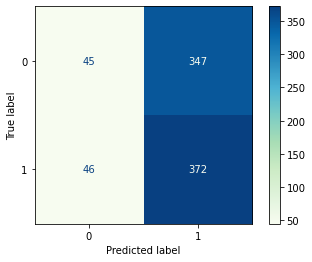

In [120]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.11      0.19       392
           1       0.52      0.89      0.65       418

    accuracy                           0.51       810
   macro avg       0.51      0.50      0.42       810
weighted avg       0.51      0.51      0.43       810



In [122]:
lr_cv_train = cross_val_score(lr, X_train, y_train, cv=5) 
lr_cv_train.mean()

0.5102880658436214

In [123]:
lr_cv_test = cross_val_score(lr, X_test, y_test, cv=5) 
lr_cv_test.mean()

0.5037037037037038

#### <font color = '#8696FE'> K-NEAREST NEIGHBORS


In [124]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### From a total of 810 observations, 413 were correctly classified 

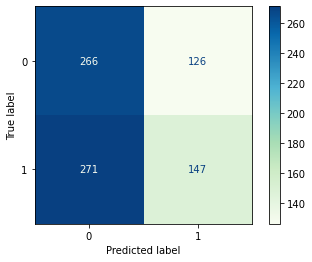

In [125]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.68      0.57       392
           1       0.54      0.35      0.43       418

    accuracy                           0.51       810
   macro avg       0.52      0.52      0.50       810
weighted avg       0.52      0.51      0.50       810



In [127]:
knn_cv_train = cross_val_score(knn, X_train, y_train, cv=5) 
knn_cv_train.mean()

0.5012345679012346

In [128]:
knn_cv_test = cross_val_score(knn, X_test, y_test, cv=5) 
knn_cv_test.mean()

0.48641975308641977

#### <font color = '#8696FE'> SUPPORT VECTOR MACHINES


In [129]:
svm_linear = SVC( kernel = 'linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

#### From a total of 810 observations, 418 were correctly classified

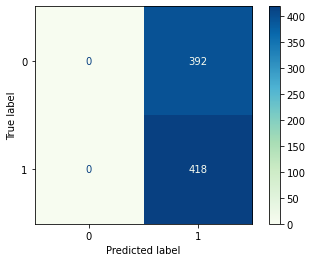

In [130]:
cm = confusion_matrix(y_test, y_pred, labels=svm_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.52      1.00      0.68       418

    accuracy                           0.52       810
   macro avg       0.26      0.50      0.34       810
weighted avg       0.27      0.52      0.35       810



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [132]:
svm_linear_train_cv = cross_val_score(svm_linear, X_train, y_train, cv=5)
svm_linear_train_cv.mean()

0.5164609053497943

In [133]:
svm_linear_test_cv = cross_val_score(svm_linear, X_test, y_test, cv=5)
svm_linear_test_cv.mean()

0.5209876543209877

#### <font color = '#8696FE'> DECISION TREES


In [134]:
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_train, y_train) 
y_pred = tree.predict(X_test)

Before tuning:

From a total of 810 observations, 385 were correctly classified

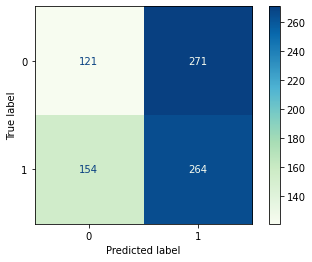

In [135]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

##### Hyperparameter tuning

In [136]:
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_dist = {"max_depth": [3,5,7,10,15],
#               'min_samples_leaf': randint(1, 9),
              "max_features": [3, 5, 7, 9, 11],
              'min_samples_split':[8,10,12,18,20,16],
#               "n_estimators": [50, 70, 100, 200],
              "criterion": ["gini", "entropy"]}

tree_cv = GridSearchCV(estimator=tree, param_grid=param_dist, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')

tree_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=25; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=33; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=41; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=48; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=48; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=56; total time=   0.0s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=64; total time=   0.1s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=72; total time=   0.1s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=3, min_samples_leaf=1, n_

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'min_samples_split': 10}
Best score is 0.5292181069958849


In [137]:
tree_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth= 15, max_features= 3, 
                                    min_samples_split= 8, random_state=1234)
tree_tuned.fit(X_train, y_train) 
y_pred = tree_tuned.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.34      0.39       392
           1       0.50      0.63      0.56       418

    accuracy                           0.49       810
   macro avg       0.48      0.48      0.47       810
weighted avg       0.48      0.49      0.48       810



#### From a total of 810 observations, 396 were correctly classified 

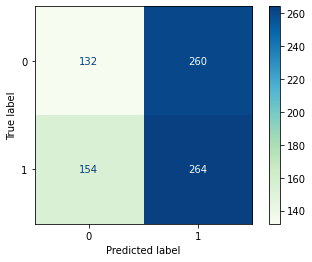

In [139]:
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()


In [140]:
# Accuracy of decision tree on train: 
tree_tuned.score(X_train, y_train)

0.6670781893004115

In [141]:
# Accuracy of decision tree on test:
tree_tuned.score(X_test, y_test)

0.4888888888888889

In [142]:
# ROC-AUC score:
round(roc_auc_score(y_test, tree_tuned.predict_proba(X_test)[:,1]),5)

0.49457

In [143]:
tree_cv_train = cross_val_score(tree_tuned, X_train, y_train, cv=10) 
tree_cv_train.mean()

0.49382716049382713

In [144]:
tree_cv_test = cross_val_score(tree_tuned, X_test, y_test, cv=10) 
tree_cv_test.mean()

0.4851851851851851

#### <font color = '#8696FE'> RANDOM FOREST


In [145]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Before tuning:

From a total of 810 observations, 398 were correctly classified 

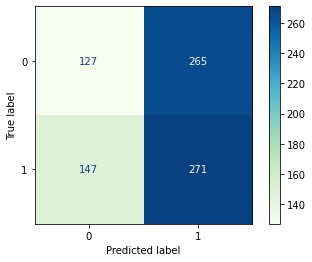

In [146]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

##### Hyperparameter tuning

In [147]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = [3, 5, 7, 9, 11]
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]


# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf
             }
param_grid

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
 'max_features': [3, 5, 7, 9, 11],
 'max_depth': [2, 4],
 'min_samples_leaf': [1, 2]}

In [148]:
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)

rf_Grid.fit(X_train, y_train)
rf_Grid.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 10}

In [149]:
# Print the best score for given hyperparameters 

print("Best score is {}".format(rf_Grid.best_score_))

Best score is 0.5292181069958848


In [150]:
# Generate predictions with the best model
y_pred = rf_Grid.predict(X_test)

#### From a total of 810 observations, 418 were correctly classified 

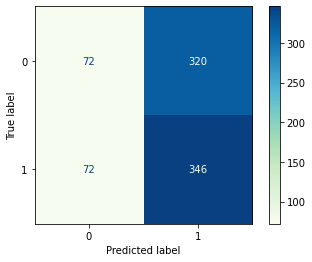

In [151]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_Grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_Grid.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.18      0.27       392
           1       0.52      0.83      0.64       418

    accuracy                           0.52       810
   macro avg       0.51      0.51      0.45       810
weighted avg       0.51      0.52      0.46       810



In [153]:
# Accuracy of rf on train:
rf_Grid.score(X_train, y_train)

0.5802469135802469

In [154]:
# Accuracy of rf on test:
rf_Grid.score(X_test, y_test)

0.5160493827160494

In [155]:
# ROC-AUC score:
round(roc_auc_score(y_test, rf_Grid.predict_proba(X_test)[:,1]),5)

0.5007

#### <font color = '#8696FE'> MULTINOMIAL NAIVE BAYES


In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax_train = scaler.fit_transform(X_train)
X_minmax_test = scaler.fit_transform(X_test)

naive = MultinomialNB()
# naive.fit(X_train, y_train)
# y_pred = naive.predict(X_test)
# Because Multinomial NB cannot work with negative values -- error: Negative values in data passed to MultinomialNB (input X)
#     we have to scale the features

naive.fit(X_minmax_train, y_train)
y_pred = naive.predict(X_minmax_test)

#### From a total of 810 observations, 418 were correctly classified 

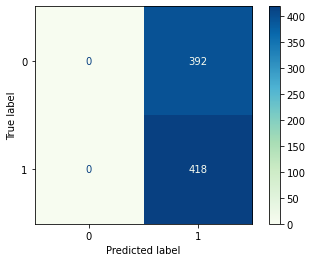

In [157]:
cm = confusion_matrix(y_test, y_pred, labels=naive.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.52      1.00      0.68       418

    accuracy                           0.52       810
   macro avg       0.26      0.50      0.34       810
weighted avg       0.27      0.52      0.35       810



/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [159]:
round(roc_auc_score(y_test,naive.predict_proba(X_test)[:,1]),5)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


0.4685

In [160]:
naive_cv_train = cross_val_score(naive, X_minmax_train, y_train, cv=10) 
naive_cv_train.mean()

0.5164609053497942

In [161]:
naive_cv_test = cross_val_score(naive, X_minmax_test, y_test, cv=10) 
naive_cv_test.mean()

0.5234567901234567

#### <font color = '#8696FE'> BERNOULLI NAIVE BAYES

In [162]:
bernoulli =  BernoulliNB()
bernoulli.fit(X_train, y_train)
# Predict on the test set
y_pred = bernoulli.predict(X_test)

#### From a total of 810 observations, 406 were correctly classified 

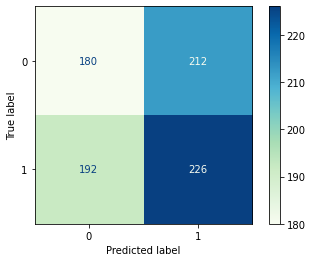

In [163]:
cm = confusion_matrix(y_test, y_pred, labels=bernoulli.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       392
           1       0.52      0.54      0.53       418

    accuracy                           0.50       810
   macro avg       0.50      0.50      0.50       810
weighted avg       0.50      0.50      0.50       810



In [165]:
bernoulli_cv_train = cross_val_score(bernoulli, X_train, y_train, cv=5) 
bernoulli_cv_train.mean()

0.5176954732510287

In [166]:
bernoulli_cv_test = cross_val_score(bernoulli, X_test, y_test, cv=5) 
bernoulli_cv_test.mean()

0.4950617283950617

#### <font color = '#8696FE'> GAUSSIAN NAIVE BAYES

In [167]:
gaussian =  GaussianNB()
gaussian.fit(X_train, y_train)
# Predict on the test set
y_pred = gaussian.predict(X_test)

#### From a total of 810 observations, 387 were correctly classified 

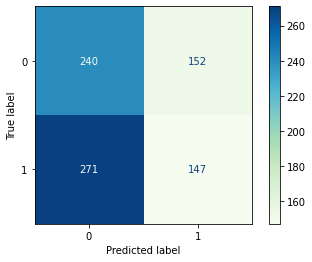

In [168]:
cm = confusion_matrix(y_test, y_pred, labels=gaussian.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.61      0.53       392
           1       0.49      0.35      0.41       418

    accuracy                           0.48       810
   macro avg       0.48      0.48      0.47       810
weighted avg       0.48      0.48      0.47       810



In [170]:
gaussian_cv_train = cross_val_score(gaussian, X_train, y_train, cv=5) 
gaussian_cv_train.mean()

0.5012345679012346

In [171]:
gaussian_cv_test = cross_val_score(gaussian, X_test, y_test, cv=5) 
gaussian_cv_test.mean()

0.5234567901234568

#### <font color = '#8696FE'> ADAPTIVE BOOSTING


In [172]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=1234)

# Train the classifier
adaboost.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test)

#### From a total of 810 observations, 421 were correctly classified 

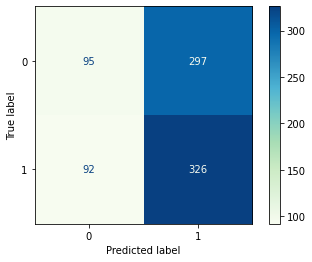

In [173]:
cm = confusion_matrix(y_test, y_pred, labels=adaboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.24      0.33       392
           1       0.52      0.78      0.63       418

    accuracy                           0.52       810
   macro avg       0.52      0.51      0.48       810
weighted avg       0.52      0.52      0.48       810



In [175]:
adaboost_cv_train = cross_val_score(adaboost, X_train, y_train, cv=5) 
adaboost_cv_train.mean()

0.522633744855967

In [176]:
adaboost_cv_test = cross_val_score(adaboost, X_test, y_test, cv=5) 
adaboost_cv_test.mean()

0.4888888888888888

#### <font color = '#8696FE'> eXTREME GRADIENT BOOSTING (XGB)


In [177]:
# Create an XGBoost classifier
xgb = XGBClassifier(n_estimators=50, random_state=1234)

# Train the classifier
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test)

#### From a total of 810 observations, 399 were correctly classified 

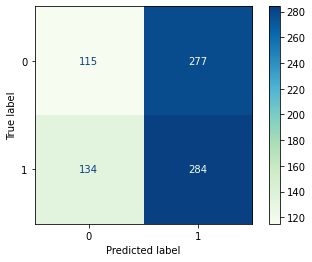

In [178]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.29      0.36       392
           1       0.51      0.68      0.58       418

    accuracy                           0.49       810
   macro avg       0.48      0.49      0.47       810
weighted avg       0.48      0.49      0.47       810



In [180]:
xgb_cv_train = cross_val_score(xgb, X_train, y_train, cv=10) 
xgb_cv_train.mean()

0.48806584362139915

In [181]:
xgb_cv_test = cross_val_score(xgb, X_test, y_test, cv=10) 
xgb_cv_test.mean()

0.4716049382716049

#### <font color = '#8696FE'> CATBOOST


In [182]:
# Create a CatBoost classifier
catboost = CatBoostClassifier(iterations=100, random_state=42)

# Train the classifier
catboost.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost.predict(X_test)

Learning rate set to 0.124333
0:	learn: 0.6918386	total: 961us	remaining: 95.2ms
1:	learn: 0.6903516	total: 1.73ms	remaining: 84.8ms
2:	learn: 0.6892657	total: 2.42ms	remaining: 78.3ms
3:	learn: 0.6883328	total: 3.25ms	remaining: 77.9ms
4:	learn: 0.6869638	total: 3.96ms	remaining: 75.3ms
5:	learn: 0.6856024	total: 4.84ms	remaining: 75.8ms
6:	learn: 0.6849412	total: 5.71ms	remaining: 75.8ms
7:	learn: 0.6836885	total: 6.52ms	remaining: 74.9ms
8:	learn: 0.6830361	total: 7.44ms	remaining: 75.3ms
9:	learn: 0.6825663	total: 8.18ms	remaining: 73.6ms
10:	learn: 0.6815351	total: 8.98ms	remaining: 72.7ms
11:	learn: 0.6804469	total: 9.88ms	remaining: 72.4ms
12:	learn: 0.6799180	total: 10.6ms	remaining: 71.1ms
13:	learn: 0.6789490	total: 11.4ms	remaining: 70.2ms
14:	learn: 0.6782032	total: 12.3ms	remaining: 69.9ms
15:	learn: 0.6771906	total: 13.2ms	remaining: 69.4ms
16:	learn: 0.6767552	total: 14ms	remaining: 68.3ms
17:	learn: 0.6759982	total: 14.8ms	remaining: 67.3ms
18:	learn: 0.6753567	total: 1

#### From a total of 810 observations, 405 were correctly classified 

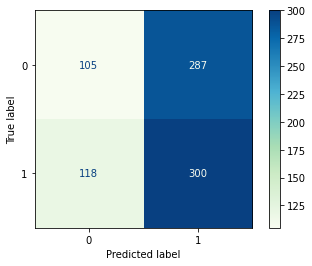

In [183]:
cm = confusion_matrix(y_test, y_pred, labels=catboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.27      0.34       392
           1       0.51      0.72      0.60       418

    accuracy                           0.50       810
   macro avg       0.49      0.49      0.47       810
weighted avg       0.49      0.50      0.47       810



In [185]:
catboost_cv_train = cross_val_score(catboost, X_train, y_train, cv=10) 
catboost_cv_train.mean()

Learning rate set to 0.118864
0:	learn: 0.6915184	total: 1.34ms	remaining: 133ms
1:	learn: 0.6901390	total: 2.55ms	remaining: 125ms
2:	learn: 0.6893494	total: 3.41ms	remaining: 110ms
3:	learn: 0.6885326	total: 4.29ms	remaining: 103ms
4:	learn: 0.6875599	total: 5.18ms	remaining: 98.5ms
5:	learn: 0.6863991	total: 6.24ms	remaining: 97.8ms
6:	learn: 0.6854298	total: 7.07ms	remaining: 94ms
7:	learn: 0.6844912	total: 8.03ms	remaining: 92.4ms
8:	learn: 0.6839118	total: 8.92ms	remaining: 90.2ms
9:	learn: 0.6832443	total: 9.75ms	remaining: 87.8ms
10:	learn: 0.6826771	total: 10.5ms	remaining: 85.1ms
11:	learn: 0.6817111	total: 11.3ms	remaining: 82.8ms
12:	learn: 0.6804335	total: 12.1ms	remaining: 81.2ms
13:	learn: 0.6797486	total: 13ms	remaining: 79.7ms
14:	learn: 0.6790489	total: 13.9ms	remaining: 78.6ms
15:	learn: 0.6780795	total: 14.6ms	remaining: 76.6ms
16:	learn: 0.6774244	total: 15.3ms	remaining: 74.9ms
17:	learn: 0.6765716	total: 16ms	remaining: 72.9ms
18:	learn: 0.6759496	total: 16.7ms	r

27:	learn: 0.6707371	total: 20.3ms	remaining: 52.2ms
28:	learn: 0.6702247	total: 21.3ms	remaining: 52ms
29:	learn: 0.6696565	total: 22.1ms	remaining: 51.5ms
30:	learn: 0.6692242	total: 22.8ms	remaining: 50.8ms
31:	learn: 0.6687150	total: 23.6ms	remaining: 50.1ms
32:	learn: 0.6683655	total: 24.4ms	remaining: 49.5ms
33:	learn: 0.6677934	total: 25.3ms	remaining: 49.1ms
34:	learn: 0.6672978	total: 25.9ms	remaining: 48.1ms
35:	learn: 0.6667801	total: 26.6ms	remaining: 47.3ms
36:	learn: 0.6662293	total: 27.4ms	remaining: 46.6ms
37:	learn: 0.6658396	total: 28.2ms	remaining: 46.1ms
38:	learn: 0.6652548	total: 29.1ms	remaining: 45.5ms
39:	learn: 0.6647646	total: 29.8ms	remaining: 44.7ms
40:	learn: 0.6641651	total: 30.5ms	remaining: 43.8ms
41:	learn: 0.6631914	total: 31.2ms	remaining: 43.1ms
42:	learn: 0.6628823	total: 32ms	remaining: 42.4ms
43:	learn: 0.6622039	total: 32.8ms	remaining: 41.7ms
44:	learn: 0.6615628	total: 33.6ms	remaining: 41.1ms
45:	learn: 0.6607836	total: 34.6ms	remaining: 40.6

12:	learn: 0.6798521	total: 7.65ms	remaining: 51.2ms
13:	learn: 0.6785345	total: 8.33ms	remaining: 51.2ms
14:	learn: 0.6779877	total: 8.95ms	remaining: 50.7ms
15:	learn: 0.6769104	total: 9.49ms	remaining: 49.8ms
16:	learn: 0.6763583	total: 10ms	remaining: 49ms
17:	learn: 0.6756878	total: 10.5ms	remaining: 48ms
18:	learn: 0.6750245	total: 11ms	remaining: 47ms
19:	learn: 0.6741669	total: 11.5ms	remaining: 46.1ms
20:	learn: 0.6736890	total: 12ms	remaining: 45.3ms
21:	learn: 0.6728100	total: 12.5ms	remaining: 44.4ms
22:	learn: 0.6718760	total: 13ms	remaining: 43.5ms
23:	learn: 0.6712243	total: 13.5ms	remaining: 42.7ms
24:	learn: 0.6707010	total: 14ms	remaining: 42ms
25:	learn: 0.6698943	total: 14.5ms	remaining: 41.3ms
26:	learn: 0.6695543	total: 15ms	remaining: 40.5ms
27:	learn: 0.6691278	total: 15.7ms	remaining: 40.3ms
28:	learn: 0.6682789	total: 16.3ms	remaining: 39.9ms
29:	learn: 0.6677799	total: 16.8ms	remaining: 39.2ms
30:	learn: 0.6672444	total: 17.4ms	remaining: 38.8ms
31:	learn: 0.

15:	learn: 0.6762268	total: 9.19ms	remaining: 48.2ms
16:	learn: 0.6759838	total: 9.79ms	remaining: 47.8ms
17:	learn: 0.6745999	total: 10.3ms	remaining: 47.1ms
18:	learn: 0.6741224	total: 10.9ms	remaining: 46.4ms
19:	learn: 0.6733078	total: 11.4ms	remaining: 45.5ms
20:	learn: 0.6727809	total: 11.9ms	remaining: 44.9ms
21:	learn: 0.6717049	total: 12.5ms	remaining: 44.3ms
22:	learn: 0.6710450	total: 13ms	remaining: 43.5ms
23:	learn: 0.6705229	total: 13.6ms	remaining: 43ms
24:	learn: 0.6695848	total: 14.2ms	remaining: 42.6ms
25:	learn: 0.6686501	total: 14.7ms	remaining: 41.9ms
26:	learn: 0.6680297	total: 15.2ms	remaining: 41.2ms
27:	learn: 0.6672816	total: 15.8ms	remaining: 40.5ms
28:	learn: 0.6665415	total: 16.4ms	remaining: 40.1ms
29:	learn: 0.6662958	total: 17ms	remaining: 39.8ms
30:	learn: 0.6657258	total: 17.6ms	remaining: 39.1ms
31:	learn: 0.6653942	total: 18.1ms	remaining: 38.6ms
32:	learn: 0.6647143	total: 18.7ms	remaining: 37.9ms
33:	learn: 0.6643078	total: 19.3ms	remaining: 37.5ms

0.5074074074074074

In [186]:
catboost_cv_test = cross_val_score(catboost, X_test, y_test, cv=10) 
catboost_cv_test.mean()

Learning rate set to 0.074356
0:	learn: 0.6917657	total: 638us	remaining: 63.2ms
1:	learn: 0.6891969	total: 1.3ms	remaining: 63.6ms
2:	learn: 0.6875230	total: 1.84ms	remaining: 59.5ms
3:	learn: 0.6863525	total: 2.28ms	remaining: 54.8ms
4:	learn: 0.6852361	total: 2.7ms	remaining: 51.3ms
5:	learn: 0.6838619	total: 3.13ms	remaining: 49.1ms
6:	learn: 0.6822360	total: 3.6ms	remaining: 47.8ms
7:	learn: 0.6808594	total: 4.02ms	remaining: 46.2ms
8:	learn: 0.6803778	total: 4.45ms	remaining: 45ms
9:	learn: 0.6792306	total: 4.89ms	remaining: 44ms
10:	learn: 0.6785328	total: 5.34ms	remaining: 43.3ms
11:	learn: 0.6774076	total: 5.76ms	remaining: 42.3ms
12:	learn: 0.6763147	total: 6.2ms	remaining: 41.5ms
13:	learn: 0.6751028	total: 6.63ms	remaining: 40.7ms
14:	learn: 0.6740324	total: 7.08ms	remaining: 40.1ms
15:	learn: 0.6727616	total: 7.53ms	remaining: 39.5ms
16:	learn: 0.6719555	total: 8.14ms	remaining: 39.7ms
17:	learn: 0.6711733	total: 8.69ms	remaining: 39.6ms
18:	learn: 0.6707831	total: 9.13ms	

8:	learn: 0.6818349	total: 4.37ms	remaining: 44.1ms
9:	learn: 0.6808502	total: 4.98ms	remaining: 44.8ms
10:	learn: 0.6800649	total: 5.58ms	remaining: 45.2ms
11:	learn: 0.6787187	total: 6.29ms	remaining: 46.1ms
12:	learn: 0.6779312	total: 7.04ms	remaining: 47.1ms
13:	learn: 0.6770682	total: 7.59ms	remaining: 46.6ms
14:	learn: 0.6765047	total: 8.12ms	remaining: 46ms
15:	learn: 0.6756470	total: 8.71ms	remaining: 45.8ms
16:	learn: 0.6749582	total: 9.22ms	remaining: 45ms
17:	learn: 0.6736816	total: 9.76ms	remaining: 44.5ms
18:	learn: 0.6729708	total: 10.3ms	remaining: 44ms
19:	learn: 0.6721150	total: 10.9ms	remaining: 43.7ms
20:	learn: 0.6711300	total: 11.7ms	remaining: 44ms
21:	learn: 0.6695511	total: 12.4ms	remaining: 44ms
22:	learn: 0.6687267	total: 13.1ms	remaining: 43.8ms
23:	learn: 0.6680255	total: 13.8ms	remaining: 43.8ms
24:	learn: 0.6670210	total: 14.5ms	remaining: 43.6ms
25:	learn: 0.6663418	total: 15.3ms	remaining: 43.5ms
26:	learn: 0.6655984	total: 16ms	remaining: 43.1ms
27:	lea

89:	learn: 0.6284264	total: 38.7ms	remaining: 4.29ms
90:	learn: 0.6280957	total: 39.5ms	remaining: 3.9ms
91:	learn: 0.6278684	total: 40ms	remaining: 3.47ms
92:	learn: 0.6271238	total: 40.4ms	remaining: 3.04ms
93:	learn: 0.6269098	total: 40.9ms	remaining: 2.61ms
94:	learn: 0.6265896	total: 41.4ms	remaining: 2.18ms
95:	learn: 0.6261270	total: 41.9ms	remaining: 1.75ms
96:	learn: 0.6253760	total: 42.4ms	remaining: 1.31ms
97:	learn: 0.6252161	total: 42.8ms	remaining: 874us
98:	learn: 0.6246272	total: 43.3ms	remaining: 437us
99:	learn: 0.6238599	total: 43.8ms	remaining: 0us
Learning rate set to 0.074356
0:	learn: 0.6918632	total: 463us	remaining: 45.8ms
1:	learn: 0.6902829	total: 891us	remaining: 43.7ms
2:	learn: 0.6887588	total: 1.43ms	remaining: 46.3ms
3:	learn: 0.6870705	total: 1.88ms	remaining: 45.1ms
4:	learn: 0.6856460	total: 2.3ms	remaining: 43.7ms
5:	learn: 0.6848013	total: 2.75ms	remaining: 43.1ms
6:	learn: 0.6834171	total: 3.18ms	remaining: 42.2ms
7:	learn: 0.6824560	total: 3.61ms	

8:	learn: 0.6827006	total: 4.68ms	remaining: 47.4ms
9:	learn: 0.6815504	total: 5.35ms	remaining: 48.1ms
10:	learn: 0.6804544	total: 5.87ms	remaining: 47.5ms
11:	learn: 0.6793302	total: 6.38ms	remaining: 46.8ms
12:	learn: 0.6782600	total: 6.85ms	remaining: 45.8ms
13:	learn: 0.6774410	total: 7.31ms	remaining: 44.9ms
14:	learn: 0.6767627	total: 7.8ms	remaining: 44.2ms
15:	learn: 0.6756728	total: 8.28ms	remaining: 43.5ms
16:	learn: 0.6750756	total: 8.76ms	remaining: 42.8ms
17:	learn: 0.6743518	total: 9.34ms	remaining: 42.6ms
18:	learn: 0.6738566	total: 9.82ms	remaining: 41.9ms
19:	learn: 0.6730189	total: 10.3ms	remaining: 41.2ms
20:	learn: 0.6724779	total: 10.8ms	remaining: 40.6ms
21:	learn: 0.6714884	total: 11.3ms	remaining: 40ms
22:	learn: 0.6706837	total: 11.8ms	remaining: 39.3ms
23:	learn: 0.6700289	total: 12.2ms	remaining: 38.7ms
24:	learn: 0.6688284	total: 12.7ms	remaining: 38.1ms
25:	learn: 0.6679776	total: 13.2ms	remaining: 37.5ms
26:	learn: 0.6673801	total: 13.7ms	remaining: 37ms


71:	learn: 0.6340040	total: 32.1ms	remaining: 12.5ms
72:	learn: 0.6332975	total: 32.9ms	remaining: 12.2ms
73:	learn: 0.6326273	total: 33.4ms	remaining: 11.7ms
74:	learn: 0.6318821	total: 33.9ms	remaining: 11.3ms
75:	learn: 0.6314082	total: 34.4ms	remaining: 10.9ms
76:	learn: 0.6309930	total: 35ms	remaining: 10.5ms
77:	learn: 0.6304812	total: 35.5ms	remaining: 10ms
78:	learn: 0.6301559	total: 36ms	remaining: 9.56ms
79:	learn: 0.6292428	total: 36.4ms	remaining: 9.1ms
80:	learn: 0.6288020	total: 36.9ms	remaining: 8.65ms
81:	learn: 0.6278980	total: 37.3ms	remaining: 8.2ms
82:	learn: 0.6271107	total: 37.8ms	remaining: 7.75ms
83:	learn: 0.6267785	total: 38.3ms	remaining: 7.3ms
84:	learn: 0.6260168	total: 38.7ms	remaining: 6.84ms
85:	learn: 0.6253294	total: 39.2ms	remaining: 6.38ms
86:	learn: 0.6248734	total: 39.8ms	remaining: 5.94ms
87:	learn: 0.6242349	total: 40.2ms	remaining: 5.48ms
88:	learn: 0.6231556	total: 40.8ms	remaining: 5.04ms
89:	learn: 0.6227237	total: 41.3ms	remaining: 4.58ms
90

0.47530864197530864

#### <font color = '#8696FE'> LIGHT GRADIENT BOOSTING MACHINE (LGBM)

In [187]:
lgbm = LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=1234)
lgbm.fit(X_train, y_train, verbose=20, eval_metric='logloss')
y_pred = lgbm.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


#### From a total of 810 observations, 407 were correctly classified

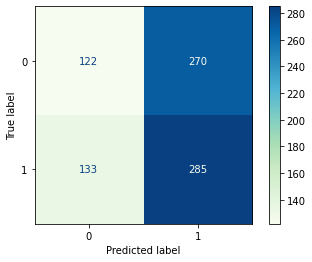

In [188]:
cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.31      0.38       392
           1       0.51      0.68      0.59       418

    accuracy                           0.50       810
   macro avg       0.50      0.50      0.48       810
weighted avg       0.50      0.50      0.48       810



In [190]:
lgbm_cv_train = cross_val_score(lgbm, X_train, y_train, cv=10) 
lgbm_cv_train.mean()

0.5041152263374485

In [191]:
lgbm_cv_test = cross_val_score(lgbm, X_test, y_test, cv=10) 
lgbm_cv_test.mean()

0.4728395061728395